## 1. Importing Libraries and Dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Defining path

path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Advanced Analytics\Metropolitan Housing Analysis\Data'

In [7]:
# Importing state dataframe

dfstate = pd.read_csv(os.path.join(path, 'Master v8 State Subset.csv'))

In [24]:
# Importing metro dataframe

dfmetro = pd.read_csv(os.path.join(path, 'Master v8 Metro Subset.csv'))

In [5]:
pd.options.display.max_columns = None

In [20]:
dfmetro.columns

Index(['Year', 'City (Zillow)', 'Area', 'CBSA', 'Type', 'Key',
       'Unprotected Acreage', '% 0 Car Households', '% 1 Car Households',
       '% 2+ Car Households', 'Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Max Walkability Index', 'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)',
       'SF Home Metropolitan Average Value', 'Population Estimate',
       'Net Population Change', 'Natural Population Change',
       'International Migration', 'Domestic Migration', 'Net Migration',
       '% Population Change', '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% SF Building Permits',
       '% 2 Unit Building Permits', '% 3-4 Unit Building Permits',
       '% 5+ Unit Building Permits', '% Multi-Unit Building Permits',
       'Total Housing Units', '% 1-Unit Detached Houses',
       '% 1-Unit Attached Houses', '% SF Houses', '% 2

## 2. Hypothesis & Exploration

##### Hypothesis

Hypothesis: even though the existence of multi-unit housing tends to correlate with higher SF house prices overall (cities are more expensive to live in), the price of SF housing increases *more* when *less* multi-unit housing is built than it would otherwise when *more* multi-unit housing is built, especially as the population of that area increases.

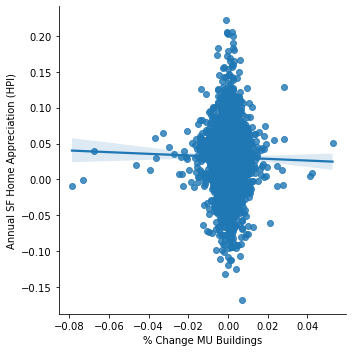

In [25]:
# (1) Plotting new variable "% Change MU Buildings" vs. both metrics for SF house appreciation

sns.lmplot(x = '% Change MU Buildings', y = 'Annual SF Home Appreciation (HPI)', data = dfmetro)

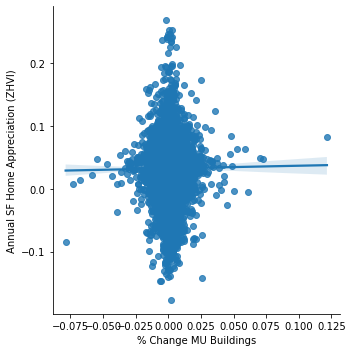

In [26]:
# (2) Plotting new variable "% Change MU Buildings" vs. both metrics for SF house appreciation

sns.lmplot(x = '% Change MU Buildings', y = 'Annual SF Home Appreciation (ZHVI)', data = dfmetro)

In [30]:
dfmetro.loc[dfmetro['% Change MU Buildings'] > .12]

,Year,City (Zillow),Area,CBSA,Type,Key,Unprotected Acreage,% 0 Car Households,% 1 Car Households,% 2+ Car Households,Residential Density,Population Density,Employment Density,Walkability Index W.AVG,Max Walkability Index,Transit Access W.AVG,Annual SF Home Appreciation (HPI),Annual SF Home Appreciation (ZHVI),SF Home Metropolitan Average Value,Population Estimate,Net Population Change,Natural Population Change,International Migration,Domestic Migration,Net Migration,% Population Change,% Migration Pop Change,% Int Mig Pop Change,% Dom Mig Pop Change,% SF Building Permits,% 2 Unit Building Permits,% 3-4 Unit Building Permits,% 5+ Unit Building Permits,% Multi-Unit Building Permits,Total Housing Units,% 1-Unit Detached Houses,% 1-Unit Attached Houses,% SF Houses,% 2 Unit Buildings,% 3-4 Unit Buildings,% 5-9 Unit Buildings,% 10-19 Unit Buildings,% 20+ Unit Buildings,% Multi-Unit Buildings,% Change MU Buildings,% Mobile Homes,"% Boats, RVs, Vans, Etc.",Owner-Occupied Units (Value Computations),"% Value <$50,000","% Value $50,000-$99,999","% Value $100,000-$149,999","% Value $150,000-$199,999","% Value $200,000-$299,999","% Value $300,000-$499,999","% Value $500,000-$999,999","% Value $1,000,000+",Owner-Occupied Unit Value Median (Dollars),Rent Median (Dollars),Occupied Units Paying Rent,% GRAPI <15%,% GRAPI 15-19.9%,% GRAPI 20-24.9%,% GRAPI 25-29.9%,% GRAPI 30-34.9%,% GRAPI >35%
4463,2019,"Heber, UT","Heber, UT",25720,Micropolitan,"25720, 2019",919184.3136,1.92%,20.52%,77.56%,0.044873,0.082939,0.038029,5.753355,15.333333,0.0,NaN,0.082028,513432.5,76236.0,1279.0,564.0,155.0,556.0,711.0,0.017063,0.009485,0.002068,0.007418,NaN,NaN,NaN,NaN,NaN,41247.0,0.672631,0.072684,0.745315,0.016486,0.028244,0.043591,0.044852,0.109608,0.242781,0.121507,0.01171,0.000194,18213.0,0.013068,0.002471,0.013507,0.035689,0.139351,0.270521,0.362214,0.16318,528400.0,1397.0,5399.0,0.140433,0.148079,0.158336,0.079075,0.109101,0.364976


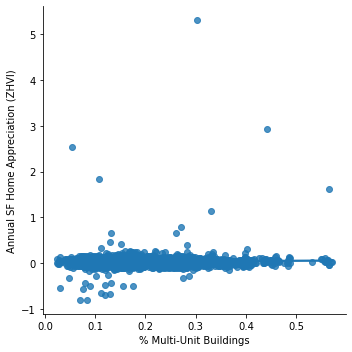

In [31]:
# (2) Plotting new variable "% Change MU Buildings" vs. both metrics for SF house appreciation

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Annual SF Home Appreciation (ZHVI)', data = dfmetro)

In [32]:
dfmetro.loc[dfmetro['Annual SF Home Appreciation (ZHVI)'] > 5]

,Year,City (Zillow),Area,CBSA,Type,Key,Unprotected Acreage,% 0 Car Households,% 1 Car Households,% 2+ Car Households,Residential Density,Population Density,Employment Density,Walkability Index W.AVG,Max Walkability Index,Transit Access W.AVG,Annual SF Home Appreciation (HPI),Annual SF Home Appreciation (ZHVI),SF Home Metropolitan Average Value,Population Estimate,Net Population Change,Natural Population Change,International Migration,Domestic Migration,Net Migration,% Population Change,% Migration Pop Change,% Int Mig Pop Change,% Dom Mig Pop Change,% SF Building Permits,% 2 Unit Building Permits,% 3-4 Unit Building Permits,% 5+ Unit Building Permits,% Multi-Unit Building Permits,Total Housing Units,% 1-Unit Detached Houses,% 1-Unit Attached Houses,% SF Houses,% 2 Unit Buildings,% 3-4 Unit Buildings,% 5-9 Unit Buildings,% 10-19 Unit Buildings,% 20+ Unit Buildings,% Multi-Unit Buildings,% Change MU Buildings,% Mobile Homes,"% Boats, RVs, Vans, Etc.",Owner-Occupied Units (Value Computations),"% Value <$50,000","% Value $50,000-$99,999","% Value $100,000-$149,999","% Value $150,000-$199,999","% Value $200,000-$299,999","% Value $300,000-$499,999","% Value $500,000-$999,999","% Value $1,000,000+",Owner-Occupied Unit Value Median (Dollars),Rent Median (Dollars),Occupied Units Paying Rent,% GRAPI <15%,% GRAPI 15-19.9%,% GRAPI 20-24.9%,% GRAPI 25-29.9%,% GRAPI 30-34.9%,% GRAPI >35%
9998,2013,"Summit Park, UT","Summit Park, UT",44920,Micropolitan,"44920, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300059,614800.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26678.0,0.608891,0.067359,0.67625,0.024215,0.036659,0.062149,0.049816,0.130032,0.302871,NaN,0.020316,0.000562,10139.0,0.017753,0.005326,0.040043,0.077818,0.154059,0.219252,0.356643,0.129105,485700.0,1239.0,3283.0,0.122958,0.14792,0.124191,0.11926,0.091834,0.393837


In [36]:
dfmetro2 = dfmetro[['% Change MU Buildings', 'Annual SF Home Appreciation (ZHVI)']]

In [39]:
dfmetro2.value_counts(dropna = False)

% Change MU Buildings  Annual SF Home Appreciation (ZHVI)
NaN                    NaN                                   1042
 0.003243              0.041519                                 1
 0.003460              0.042101                                 1
                       0.047712                                 1
 0.003462              0.145444                                 1
                                                             ... 
-0.001383              0.032302                                 1
-0.001382              0.033238                                 1
-0.001381              0.009976                                 1
-0.001379              0.018947                                 1
 0.000860              NaN                                      1
Length: 10262, dtype: int64

In [40]:
# Crude way of filtering out all NaNs

dfmetro2 = dfmetro2.loc[dfmetro2['% Change MU Buildings'] < 100]

In [45]:
dfmetro2 = dfmetro2.loc[dfmetro2['Annual SF Home Appreciation (ZHVI)'] < 100]

In [46]:
dfmetro2.value_counts(dropna = False)

% Change MU Buildings  Annual SF Home Appreciation (ZHVI)
-0.078717              -0.084082                             1
 0.002294               0.109159                             1
 0.002325               0.036791                             1
 0.002323               0.052203                             1
 0.002316               0.044296                             1
                                                            ..
-0.001754               0.055183                             1
                        0.028185                             1
-0.001756              -0.047996                             1
                        0.066301                             1
 0.121507               0.082028                             1
Length: 8490, dtype: int64

## 3. Linear Regression Setup

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = dfmetro2['% Change MU Buildings'].values.reshape(-1,1)
y = dfmetro2['Annual SF Home Appreciation (ZHVI)'].values.reshape(-1,1)

In [48]:
X

array([[-0.01100073],
       [-0.00450941],
       [-0.00587607],
       ...,
       [ 0.0095074 ],
       [-0.00984313],
       [ 0.01607379]])

In [49]:
y

array([[ 0.00864194],
       [-0.01595629],
       [ 0.02473744],
       ...,
       [ 0.03058876],
       [ 0.04576166],
       [ 0.01982995]])

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [51]:
# Create a regression object.

regression = LinearRegression()

In [52]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

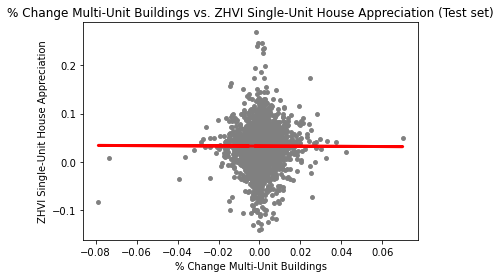

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('% Change Multi-Unit Buildings vs. ZHVI Single-Unit House Appreciation (Test set)')
plot_test.xlabel('% Change Multi-Unit Buildings')
plot_test.ylabel('ZHVI Single-Unit House Appreciation')
plot_test.show()

Clearly linear regression is not apt to capture any trends here. The data doesn't follow a linear pattern at all. The machine has done its best, but a line can only hit so many dots.

In [55]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [56]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01635444]]
Mean squared error:  0.0016873062982347994
R2 score:  -0.00020522436854086834


In [57]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.086063,0.032642
1,0.005880,0.032542
2,0.041466,0.032585
3,-0.099544,0.032849
4,0.051505,0.032533
5,0.059560,0.032599
6,-0.012063,0.032586
7,0.050031,0.032612
8,-0.001505,0.032596
9,0.031734,0.032808


Interestingly the mean squared error is extremely low - that's likely due to the mirrored nature of the plot, where the top half of the values mostly cancel out the bottom half. The r2 is of course tiny, meaning the model isn't predicting well at all. This is further evidenced in the actual to predicted comparison above. My hypothesis does include the caveat that the trend I'm looking for will only happen as population change increases - I'm looking forward to the multi-variable regression in the next exercise.